In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os, sys, time, pickle, math
%matplotlib inline

In [2]:
def import_result_penalizedEM(fname):
    with open(fname, "rb") as p:
        res1 = pickle.load(p)
    pi = [r["pi"] for r in res1]
    mu = [r["mu"] for r in res1]
    conv = [r["conv"] for r in res1]
    p_loss = [r["p_loss"] for r in res1]
    d_loss = [r["d_loss"] for r in res1]
    iters = [r["iters"] for r in res1]
    time = [r["time"] for r in res1]
    return pi, mu, conv, p_loss, d_loss, iters, time

In [3]:
#K=5-lam=1.0-N=500
pi, mu, _, p_loss, d_loss, iters, _ = import_result_penalizedEM("results_multi_adv_EM/Penalized-K=5-lam=1.0-N=500.p")
plt.style.use('seaborn-whitegrid')

Losses

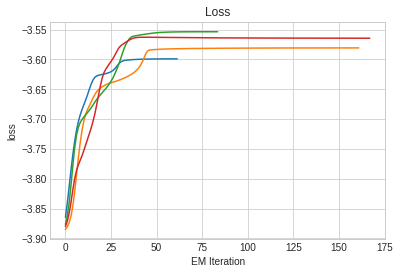

In [4]:
fig = plt.figure()
ax = plt.axes()

plt.title("Loss")
plt.xlabel("EM Iteration")
plt.ylabel("loss");
x = np.linspace(0, 180, 180)
for loss in d_loss:
    ax.plot(x[:len(loss)-1], loss[1:])


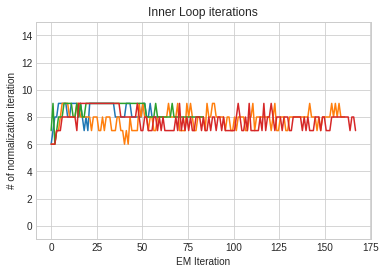

In [5]:
fig = plt.figure()
ax = plt.axes()

plt.ylim(-1, 15);
plt.title("Inner Loop iterations")
plt.xlabel("EM Iteration")
plt.ylabel("# of normalization iteration");
x = np.linspace(0, 180, 180)
for i in iters:
    ax.plot(x[:len(i)], i)


In [6]:
def MoG_prob(x, pi, mu):
    K, dim = mu.shape
    assert x.shape == (dim,)
    assert pi.shape == (K,)
    prob = 0.0
    for k in range(K):
        log_prob_k = -dim * 0.5 * math.log(2 * math.pi) - 0.5 * (x - mu[k]).dot(x - mu[k])
        prob += np.exp(log_prob_k) * pi[k]
    return prob

def MoG_plot(pi, mu):
    plt.figure(figsize=(5, 5))
    
    x1 = x2 = np.linspace(-2.0, 8.0, 101)
    p_lists = []
    for _x1 in x1:
        p = []
        for _x2 in x2:
            p.append(MoG_prob(np.array((_x1, _x2)), pi, mu) )
        p_lists.append(p)
    P = np.array(p_lists)
    
    plt.imshow(P, origin='lower', interpolation='bilinear')
    plt.xticks(np.linspace(0, 100, 6), np.linspace(-2, 8, 6))
    plt.yticks(np.linspace(0, 100, 6), np.linspace(-2, 8, 6))

In [7]:
data_fname = 'data_multi_adv.npz'
load_data = np.load(data_fname)
true_pi = load_data['pi']
true_mu = load_data['mu']
samples = load_data['samples']
adv_sample = load_data['adv_sample']

In [8]:
true_pi

array([0.0960792 , 0.17889669, 0.25452535, 0.19189888, 0.27859988])

In [9]:
true_mu

array([[1., 1.],
       [1., 5.],
       [3., 3.],
       [5., 1.],
       [5., 5.]])

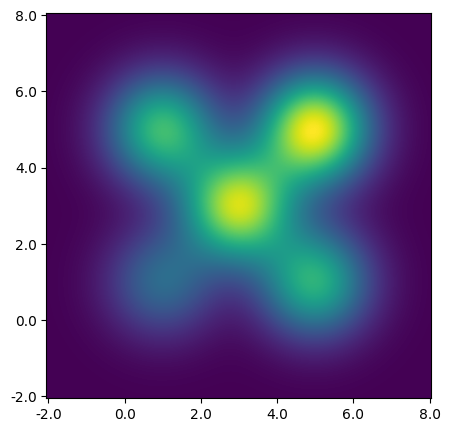

In [10]:
plt.style.use('default')
MoG_plot(true_pi, true_mu)

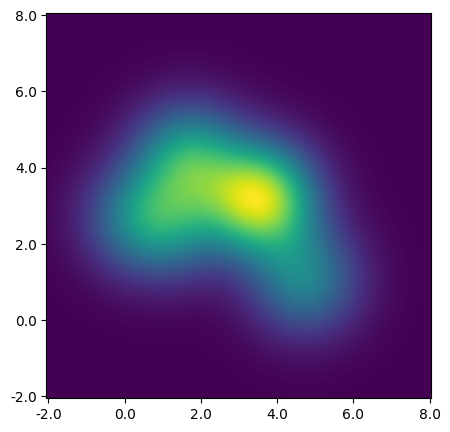

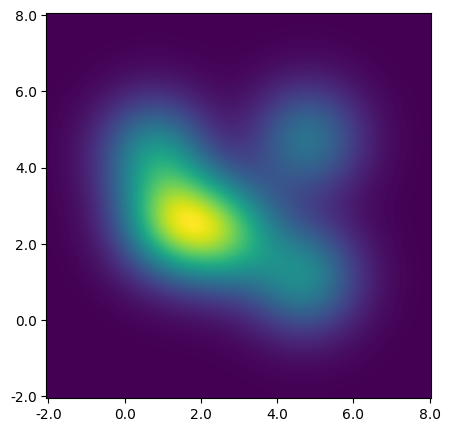

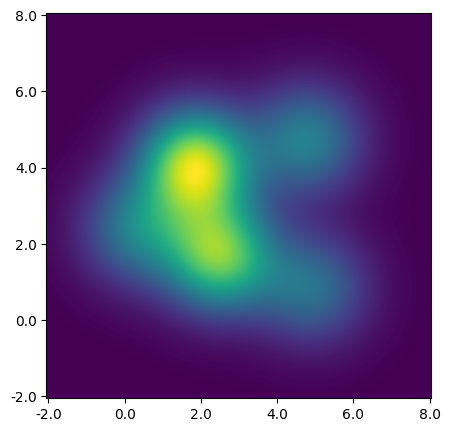

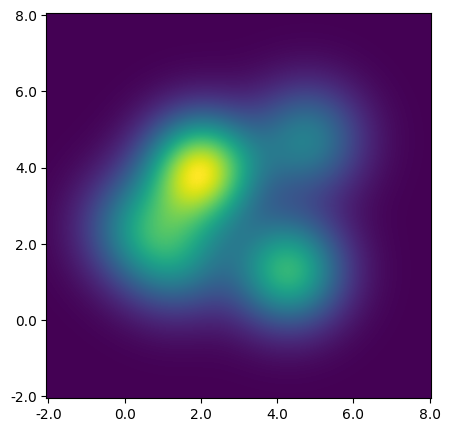

In [11]:
plt.style.use('default')
for i in range(len(pi)):
    MoG_plot(pi[i], mu[i])

In [15]:
#K=5-lam=0.1
pi, mu, _, p_loss, d_loss, iters, _ = import_result_penalizedEM("results_multi_adv_EM/Penalized-K=5-lam=0.1-N=500.p")
plt.style.use('seaborn-whitegrid')

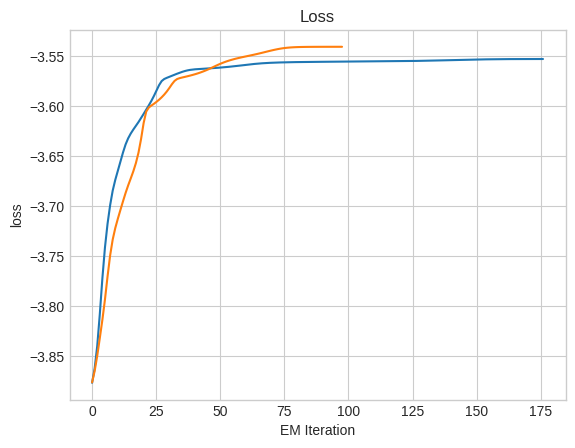

In [17]:
fig = plt.figure()
ax = plt.axes()

plt.title("Loss")
plt.xlabel("EM Iteration")
plt.ylabel("loss");
x = np.linspace(0, 200, 200)
for loss in d_loss:
    ax.plot(x[:len(loss)-1], loss[1:])

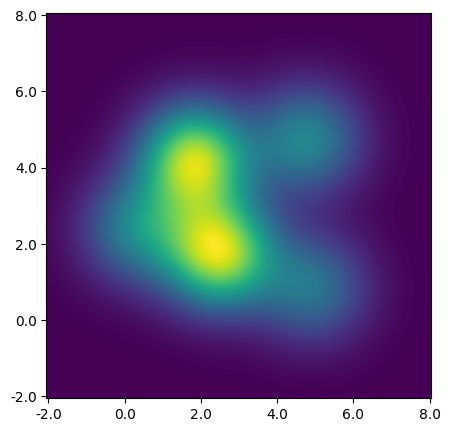

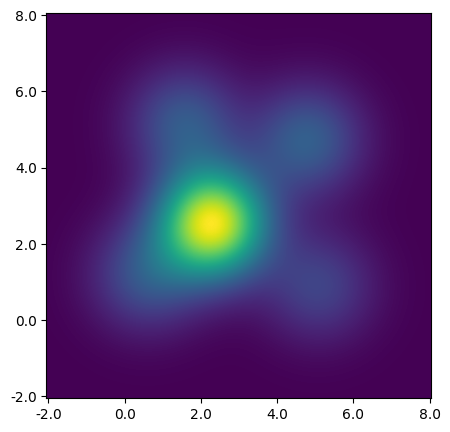

In [18]:
plt.style.use('default')
for i in range(len(pi)):
    MoG_plot(pi[i], mu[i])